## Installation & Setup

In [1]:
!pip install pyspark
!pip install findspark

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 317.0/317.0 MB 1.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyspark: filename=pyspark-3.5.1-py2.py3-none-any.whl size=317488491 sha256=d3e800e4e8fcf6ec07fa09b70547891217a9d1075c0b66c374f4ff69c794ac0a
  Stored in directory: /root/.cache/pip/wheels/80/1d/60/2c256ed38dddce2fdd93be545214a63e02fbd8d74fb0b7f3a6
Successfully built pyspark


JVM is required for Apache spark. Google Colab should already have it. Search in /lib/jvm directory

In [2]:
import os
# print(os.environ)
os.environ["JAVA_HOME"] = "/lib/jvm/java-11-openjdk-amd64"

In [3]:
import findspark
findspark.init()

In [4]:
import pyspark
pyspark.__version__

'3.5.1'

## Loading the Dataset
#### Download from here: https://github.com/nailson/ifood-data-business-analyst-test/blob/master/ifood_df.csv

In [5]:
from pyspark.sql import SparkSession

spark = SparkSession.builder \
        .appName('Marketing Campaign') \
        .getOrCreate()
spark

In [10]:
!pip install wget

  Preparing metadata (setup.py) ... done
  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9656 sha256=747ad0a2f679c2f870fda67c56f9e5b319c5df6ae0387d16f5a3ebeee5ccf0f9
  Stored in directory: /root/.cache/pip/wheels/8b/f1/7f/5c94f0a7a505ca1c81cd1d9208ae2064675d97582078e6c769
Successfully built wget


In [29]:
import wget
url = 'https://raw.githubusercontent.com/nailson/ifood-data-business-analyst-test/master/ifood_df.csv'
file_path = wget.download(url)
df = spark.read.csv(file_path, header=True, inferSchema=True) # use this
# df.show(5) # to view the spark dataframe

## Viewing the DataFrame

In [12]:
len(df.columns), df.count()

(39, 2205)

In [13]:
df.columns, df.dtypes, df.printSchema()

root
 |-- Income: double (nullable = true)
 |-- Kidhome: integer (nullable = true)
 |-- Teenhome: integer (nullable = true)
 |-- Recency: integer (nullable = true)
 |-- MntWines: integer (nullable = true)
 |-- MntFruits: integer (nullable = true)
 |-- MntMeatProducts: integer (nullable = true)
 |-- MntFishProducts: integer (nullable = true)
 |-- MntSweetProducts: integer (nullable = true)
 |-- MntGoldProds: integer (nullable = true)
 |-- NumDealsPurchases: integer (nullable = true)
 |-- NumWebPurchases: integer (nullable = true)
 |-- NumCatalogPurchases: integer (nullable = true)
 |-- NumStorePurchases: integer (nullable = true)
 |-- NumWebVisitsMonth: integer (nullable = true)
 |-- AcceptedCmp3: integer (nullable = true)
 |-- AcceptedCmp4: integer (nullable = true)
 |-- AcceptedCmp5: integer (nullable = true)
 |-- AcceptedCmp1: integer (nullable = true)
 |-- AcceptedCmp2: integer (nullable = true)
 |-- Complain: integer (nullable = true)
 |-- Z_CostContact: integer (nullable = true)
 

(['Income',
  'Kidhome',
  'Teenhome',
  'Recency',
  'MntWines',
  'MntFruits',
  'MntMeatProducts',
  'MntFishProducts',
  'MntSweetProducts',
  'MntGoldProds',
  'NumDealsPurchases',
  'NumWebPurchases',
  'NumCatalogPurchases',
  'NumStorePurchases',
  'NumWebVisitsMonth',
  'AcceptedCmp3',
  'AcceptedCmp4',
  'AcceptedCmp5',
  'AcceptedCmp1',
  'AcceptedCmp2',
  'Complain',
  'Z_CostContact',
  'Z_Revenue',
  'Response',
  'Age',
  'Customer_Days',
  'marital_Divorced',
  'marital_Married',
  'marital_Single',
  'marital_Together',
  'marital_Widow',
  'education_2n Cycle',
  'education_Basic',
  'education_Graduation',
  'education_Master',
  'education_PhD',
  'MntTotal',
  'MntRegularProds',
  'AcceptedCmpOverall'],
 [('Income', 'double'),
  ('Kidhome', 'int'),
  ('Teenhome', 'int'),
  ('Recency', 'int'),
  ('MntWines', 'int'),
  ('MntFruits', 'int'),
  ('MntMeatProducts', 'int'),
  ('MntFishProducts', 'int'),
  ('MntSweetProducts', 'int'),
  ('MntGoldProds', 'int'),
  ('NumDea

In [14]:
df.describe().toPandas().head()

,summary,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,...,marital_Together,marital_Widow,education_2n Cycle,education_Basic,education_Graduation,education_Master,education_PhD,MntTotal,MntRegularProds,AcceptedCmpOverall
0,count,2205,2205,2205,2205,2205,2205,2205,2205,2205,...,2205,2205,2205,2205,2205,2205,2205,2205,2205,2205
1,mean,51622.0947845805,0.4421768707482993,0.5065759637188209,49.00907029478458,306.16462585034014,26.4031746031746,165.31201814058957,37.756462585034015,27.128344671201813,...,0.2575963718820862,0.034467120181405894,0.08979591836734693,0.024489795918367346,0.5047619047619047,0.16507936507936508,0.21587301587301588,562.7646258503402,518.7074829931972,0.29931972789115646
2,stddev,20713.063825880206,0.5371319070591023,0.544380068555848,28.9321113700268,337.4938389172244,39.784483939484645,217.78450667629983,54.82463471718743,41.13046767727304,...,0.4374097058862869,0.18246708534725928,0.2859540088438967,0.154599111310418,0.5000907358686357,0.3713363755019449,0.41151993755325067,575.9369108204297,553.8472480705673,0.6804400264379469
3,min,1730.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,4,-283,0
4,max,113734.0,2,2,99,1493,199,1725,259,262,...,1,1,1,1,1,1,1,2491,2458,4


## Data Processing

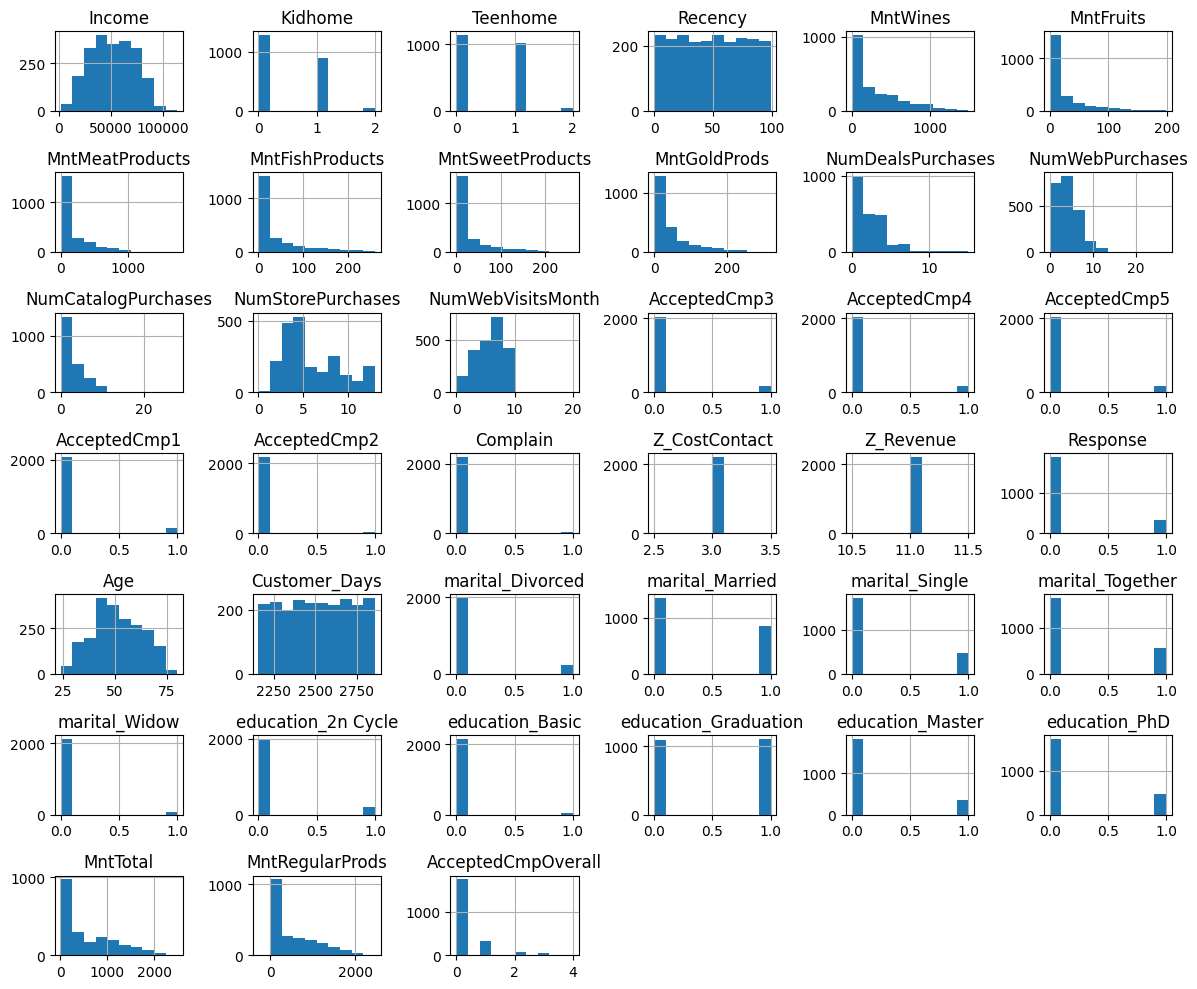

In [15]:
import matplotlib.pyplot as plt
import pandas as pd

pandas_df = df.toPandas()

pandas_df.hist(figsize=(12, 10))# Plot histograms for all features
plt.tight_layout()
plt.show()

Z_CostContact and Z_Revenue are constant for all rows, so they can be discarded

In [16]:
df = df.drop("Z_CostContact","Z_Revenue")
df.columns

['Income',
 'Kidhome',
 'Teenhome',
 'Recency',
 'MntWines',
 'MntFruits',
 'MntMeatProducts',
 'MntFishProducts',
 'MntSweetProducts',
 'MntGoldProds',
 'NumDealsPurchases',
 'NumWebPurchases',
 'NumCatalogPurchases',
 'NumStorePurchases',
 'NumWebVisitsMonth',
 'AcceptedCmp3',
 'AcceptedCmp4',
 'AcceptedCmp5',
 'AcceptedCmp1',
 'AcceptedCmp2',
 'Complain',
 'Response',
 'Age',
 'Customer_Days',
 'marital_Divorced',
 'marital_Married',
 'marital_Single',
 'marital_Together',
 'marital_Widow',
 'education_2n Cycle',
 'education_Basic',
 'education_Graduation',
 'education_Master',
 'education_PhD',
 'MntTotal',
 'MntRegularProds',
 'AcceptedCmpOverall']

Spark requires all the features to be in a list like structure

In [17]:
from pyspark.ml.feature import VectorAssembler

required_features = [c for c in df.columns if c != 'Response']
# print(required_features)
assembler = VectorAssembler(inputCols=required_features, outputCol='features')
df = assembler.transform(df)

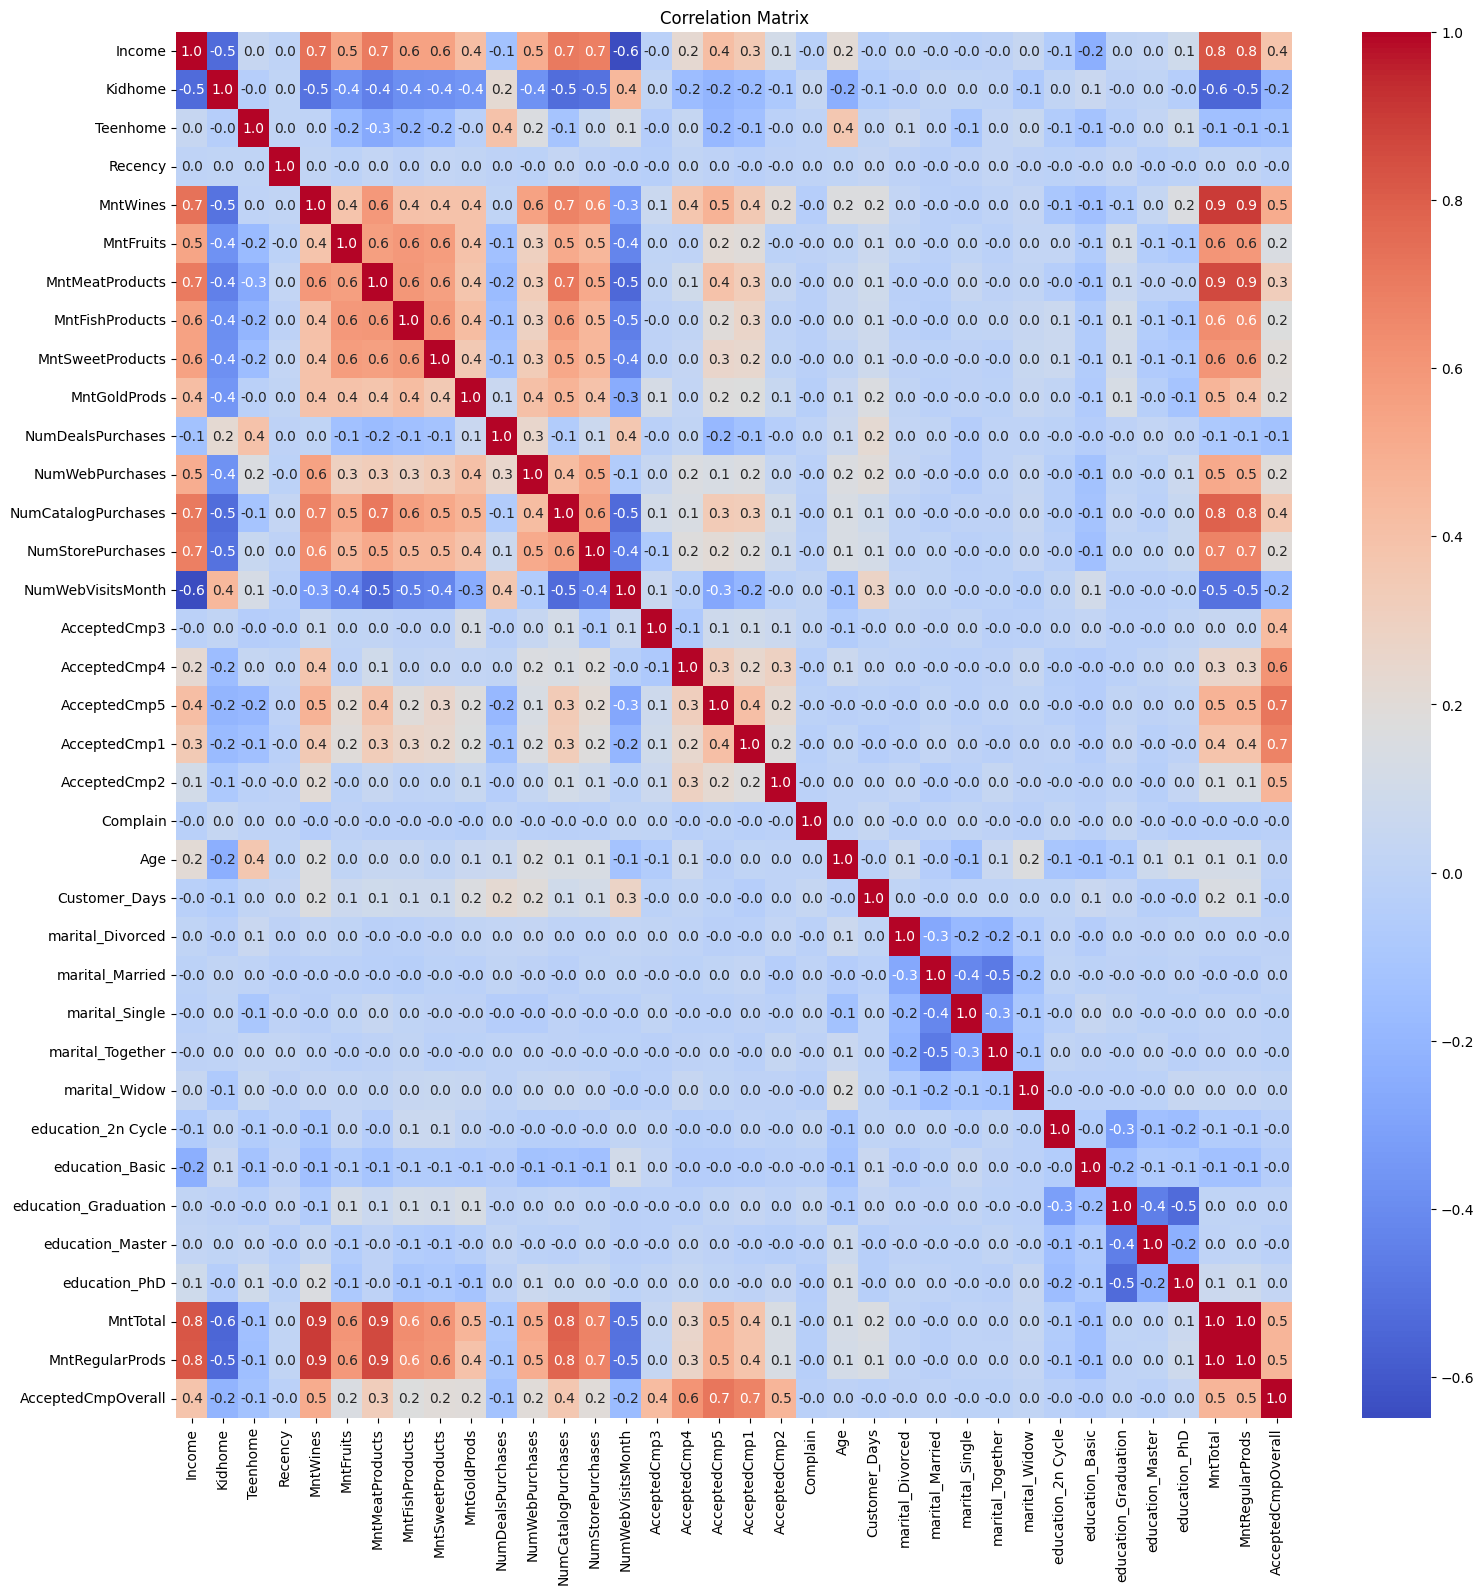

In [18]:
from pyspark.ml.stat import Correlation
import seaborn as sns

correlation_matrix = Correlation.corr(df, "features").head()
# correlation_matrix

correlation_array = correlation_matrix[0].toArray() # Convert correlation matrix to pandas DataFrame
correlation_df = pd.DataFrame(correlation_array, columns=required_features, index=required_features)

plt.figure(figsize=(18, 18))
sns.heatmap(correlation_df, annot=True, cmap='coolwarm', fmt=".1f")
plt.title("Correlation Matrix")
plt.show()

In [19]:
from pyspark.sql.functions import col
# ! pip install missingno

In [28]:
from pyspark.sql import functions
# print(dir(functions)) # to see all the functions provided by pyspark

To visualize the missing values -> below matrix shows that there are no missing values.

As all columns are either int or double (requires by SparkML), no encoding required as seen above using df.printSchema()

<Axes: >

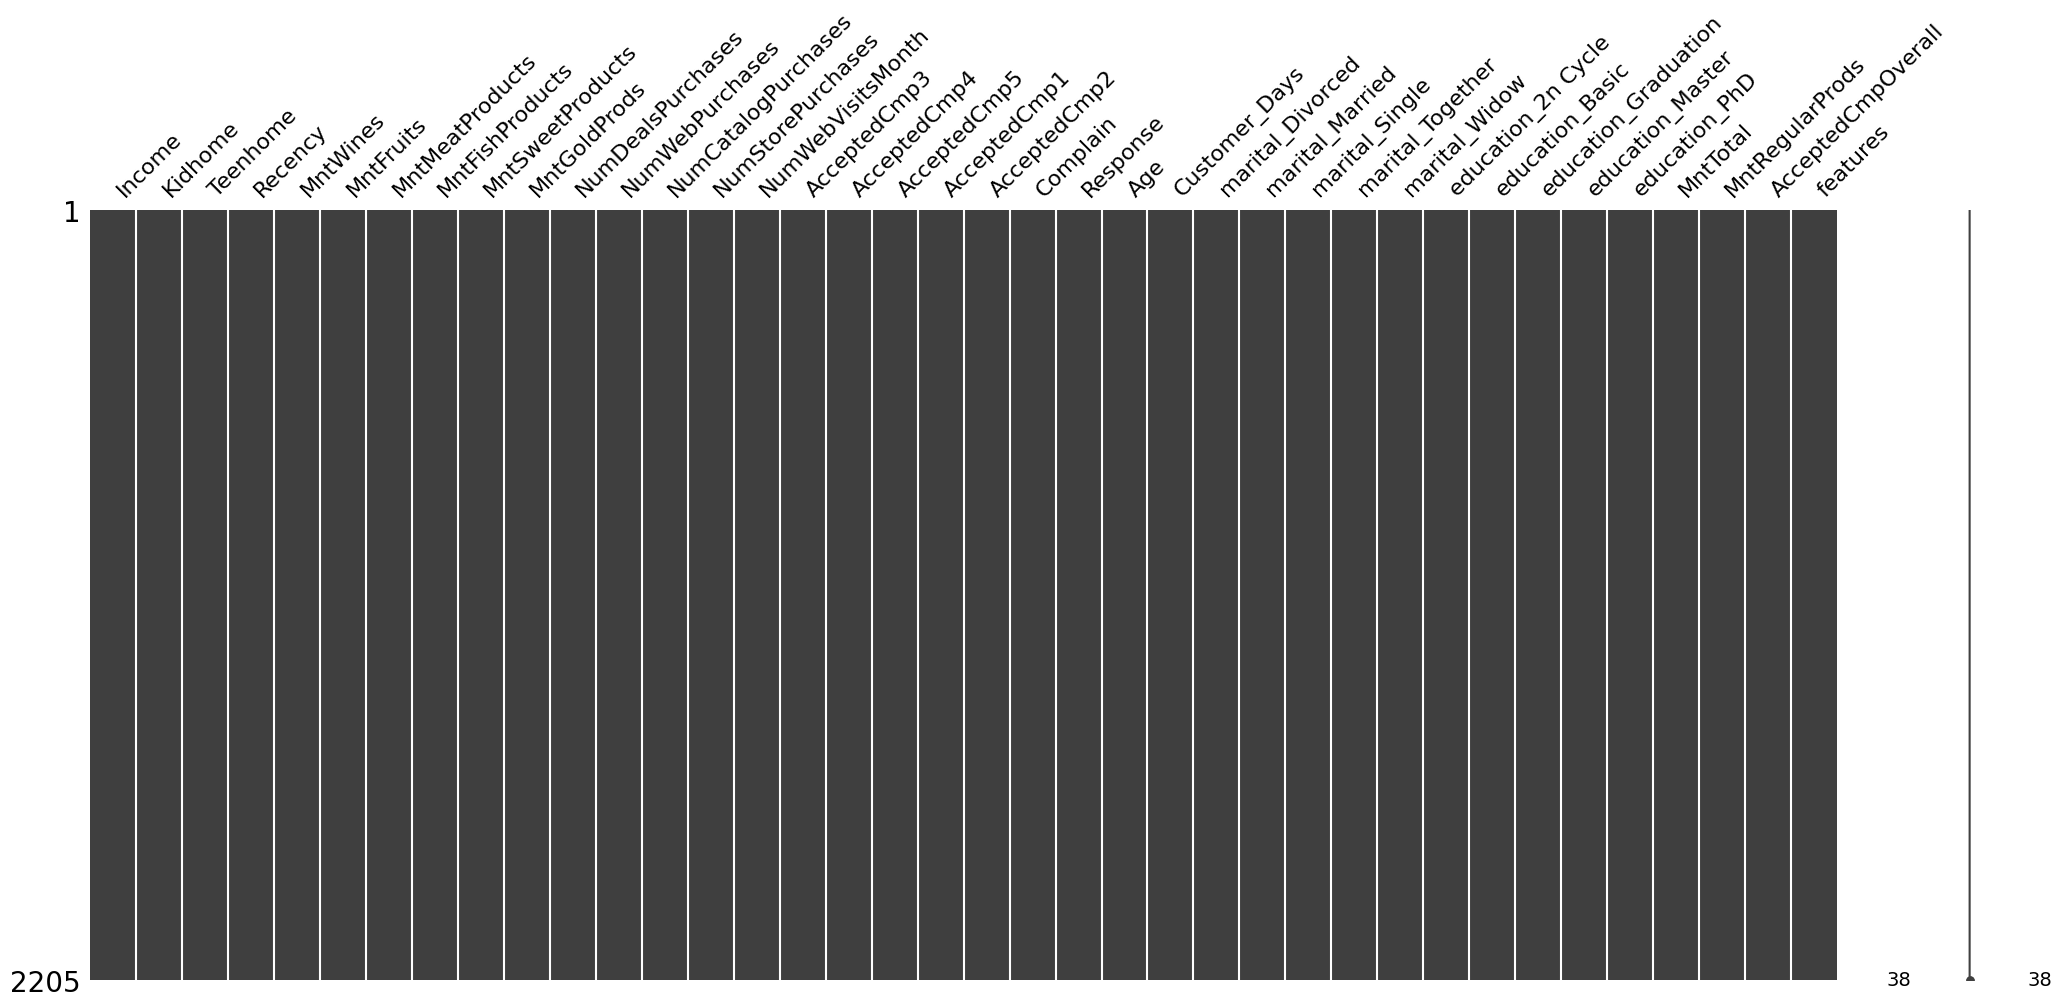

In [21]:
import missingno as msno
pandas_df = df.toPandas()
msno.matrix(pandas_df)

## SparkML (MLlib)
## Customer Response Prediction

In [22]:
from pyspark.ml.classification import RandomForestClassifier
from pyspark.ml.evaluation import BinaryClassificationEvaluator

In [23]:
# df.select(col('Response')).toPandas().describe()
train_df, test_df = df.randomSplit([0.8,0.2])

In [24]:
rf = RandomForestClassifier(labelCol='Response', featuresCol='features', numTrees=100)
model = rf.fit(train_df)

In [27]:
predictions = model.transform(test_df)
evaluator = BinaryClassificationEvaluator(labelCol='Response')
accuracy = evaluator.evaluate(predictions)


print("Accuracy:", accuracy)
print("Area Under ROC:", evaluator.evaluate(predictions, {evaluator.metricName: "areaUnderROC"}))
print("Area Under PR:", evaluator.evaluate(predictions, {evaluator.metricName: "areaUnderPR"}))

# Feature Importance
feature_importance = model.featureImportances.toArray()
feature_importance_df = pd.DataFrame(feature_importance, columns=["importance"], index=required_features)
print("Feature Importance:")
print(feature_importance_df)

Accuracy: 0.8860360360360355
Area Under ROC: 0.8860360360360355
Area Under PR: 0.6051298820683616
Feature Importance:
                      importance
Income                  0.049375
Kidhome                 0.002649
Teenhome                0.016068
Recency                 0.089124
MntWines                0.038339
MntFruits               0.016062
MntMeatProducts         0.042399
MntFishProducts         0.016860
MntSweetProducts        0.015628
MntGoldProds            0.024905
NumDealsPurchases       0.020054
NumWebPurchases         0.014086
NumCatalogPurchases     0.029857
NumStorePurchases       0.019336
NumWebVisitsMonth       0.029437
AcceptedCmp3            0.043659
AcceptedCmp4            0.016466
AcceptedCmp5            0.077873
AcceptedCmp1            0.050281
AcceptedCmp2            0.022900
Complain                0.000000
Age                     0.025940
Customer_Days           0.052489
marital_Divorced        0.006120
marital_Married         0.005433
marital_Single          

## Grid Search - Hyperparameter Optimization

In [26]:
from pyspark.ml.tuning import ParamGridBuilder, CrossValidator

param_grid = (ParamGridBuilder()
               .addGrid(rf.maxDepth, [5, 10, 15])
               .addGrid(rf.numTrees, [50, 100, 150])
               .build())

evaluator = BinaryClassificationEvaluator(labelCol='Response')

cv = CrossValidator(estimator=rf, estimatorParamMaps=param_grid, evaluator=evaluator, numFolds=5)

# Train model
cv_model = cv.fit(train_df)

# Make predictions
predictions = cv_model.transform(test_df)

# Evaluate model
accuracy = evaluator.evaluate(predictions)
print("Accuracy:", accuracy)
print("Area Under ROC:", evaluator.evaluate(predictions, {evaluator.metricName: "areaUnderROC"}))
print("Area Under PR:", evaluator.evaluate(predictions, {evaluator.metricName: "areaUnderPR"})) # precision-recall curve

# Best model parameters
best_model = cv_model.bestModel
print("Best Max Depth:", best_model._java_obj.getMaxDepth())
print("Best Num Trees:", best_model._java_obj.getNumTrees())

Accuracy: 0.9021171171171173
Area Under ROC: 0.9021171171171173
Area Under PR: 0.6578961020169256
Best Max Depth: 10
Best Num Trees: 150


In [30]:
spark.stop()